In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
print('skewness')
print(df1.skew())
print('kurtosis')
print(df1.kurt())

skewness
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
kurtosis
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


In [7]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## outcome(target variable)

In [8]:
df1['Outcome'].value_counts('%')

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

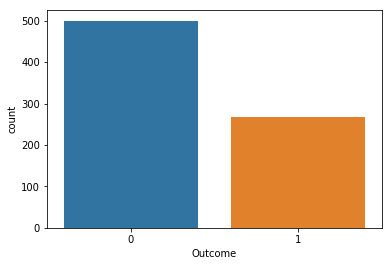

In [9]:
sns.countplot(df1['Outcome'])
plt.show()

In [10]:
### 34.8% female have diabetes

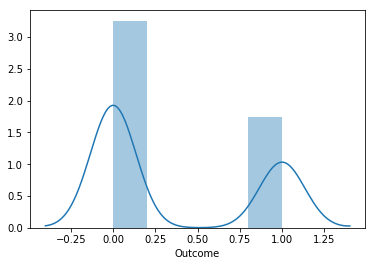

In [11]:
sns.distplot(df1['Outcome'])

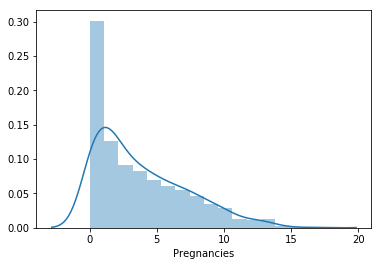

In [12]:
sns.distplot(df1['Pregnancies'])
plt.show()

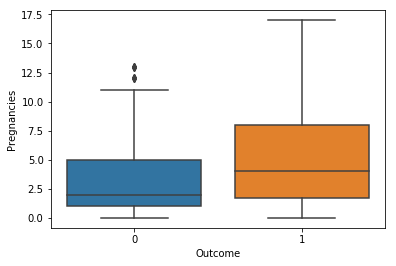

In [13]:
sns.boxplot(df1['Outcome'],df1['Pregnancies'])
plt.show()

In [14]:
df1['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [15]:
def preg(x):
    if x<1:
        return('no pregenancy')
    elif x>=1 and x<=4:
        return('1-4')
    elif x>4 and x<=7:
        return('4-7')
    elif x>7:
        return('7+')
df1['Pregnancies']=df1['Pregnancies'].apply(preg)

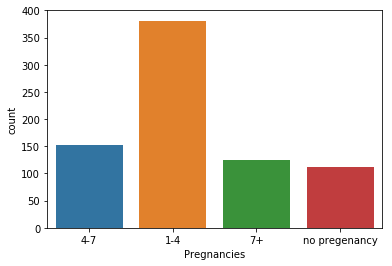

In [16]:
sns.countplot(df1['Pregnancies'])
plt.show()

In [17]:
df1['Pregnancies'].value_counts('%')
## majority of females have been pregnant more than 1 to 4 times

1-4              0.496094
4-7              0.197917
7+               0.161458
no pregenancy    0.144531
Name: Pregnancies, dtype: float64

In [18]:
df1.groupby('Pregnancies')['Outcome'].value_counts()

Pregnancies    Outcome
1-4            0          283
               1           98
4-7            0           90
               1           62
7+             1           70
               0           54
no pregenancy  0           73
               1           38
Name: Outcome, dtype: int64

In [19]:
df1.groupby('Pregnancies')['Outcome'].value_counts('%')

## females who have been pregnant more than 7 times have higher probability of being diabetic

Pregnancies    Outcome
1-4            0          0.742782
               1          0.257218
4-7            0          0.592105
               1          0.407895
7+             1          0.564516
               0          0.435484
no pregenancy  0          0.657658
               1          0.342342
Name: Outcome, dtype: float64

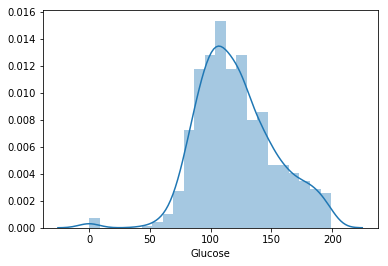

In [20]:
sns.distplot(df1['Glucose'])
plt.show()

In [21]:
df1['Glucose'].value_counts('%')

100    0.022135
99     0.022135
129    0.018229
125    0.018229
111    0.018229
106    0.018229
95     0.016927
108    0.016927
105    0.016927
102    0.016927
112    0.016927
122    0.015625
109    0.015625
107    0.014323
117    0.014323
90     0.014323
120    0.014323
114    0.014323
124    0.014323
128    0.014323
119    0.014323
115    0.013021
84     0.013021
91     0.011719
92     0.011719
123    0.011719
146    0.011719
126    0.011719
103    0.011719
101    0.011719
         ...   
75     0.002604
76     0.002604
77     0.002604
170    0.002604
195    0.002604
57     0.002604
174    0.002604
175    0.002604
188    0.002604
153    0.002604
159    0.002604
62     0.001302
72     0.001302
56     0.001302
44     0.001302
65     0.001302
61     0.001302
198    0.001302
67     0.001302
190    0.001302
149    0.001302
191    0.001302
186    0.001302
182    0.001302
178    0.001302
177    0.001302
172    0.001302
169    0.001302
160    0.001302
199    0.001302
Name: Glucose, Length: 1

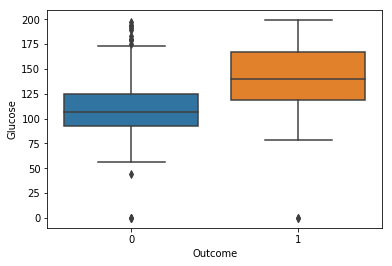

In [22]:
sns.boxplot(df1['Outcome'],df1['Glucose'])
plt.show()

In [23]:
df1.groupby('Outcome')['Glucose'].value_counts('%')

Outcome  Glucose
0        99         0.034000
         100        0.026000
         106        0.026000
         111        0.022000
         95         0.020000
         105        0.020000
         108        0.020000
         84         0.018000
         90         0.018000
         91         0.018000
         102        0.018000
         112        0.018000
         114        0.018000
         117        0.018000
         122        0.018000
         88         0.016000
         92         0.016000
         96         0.016000
         101        0.016000
         103        0.016000
         107        0.016000
         120        0.016000
         129        0.016000
         87         0.014000
         94         0.014000
         97         0.014000
         109        0.014000
         119        0.014000
         123        0.014000
         125        0.014000
                      ...   
1        194        0.007463
         195        0.007463
         78         0.0037

In [24]:
df1.groupby('Outcome')['Glucose'].describe()

## patients with higher glucose have higher chance of having diabetes

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


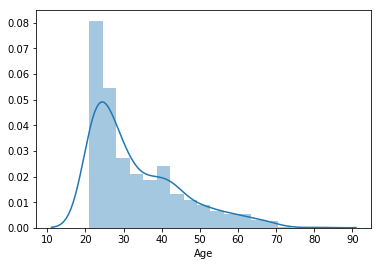

In [25]:
sns.distplot(df1['Age'])
plt.show()

In [26]:
df1['Age'].value_counts('%')

22    0.093750
21    0.082031
25    0.062500
24    0.059896
23    0.049479
28    0.045573
26    0.042969
27    0.041667
29    0.037760
31    0.031250
41    0.028646
30    0.027344
37    0.024740
42    0.023438
33    0.022135
32    0.020833
36    0.020833
38    0.020833
45    0.019531
34    0.018229
40    0.016927
43    0.016927
46    0.016927
39    0.015625
35    0.013021
50    0.010417
44    0.010417
51    0.010417
52    0.010417
58    0.009115
47    0.007812
54    0.007812
57    0.006510
60    0.006510
48    0.006510
49    0.006510
53    0.006510
55    0.005208
62    0.005208
63    0.005208
66    0.005208
56    0.003906
59    0.003906
65    0.003906
67    0.003906
61    0.002604
69    0.002604
72    0.001302
64    0.001302
68    0.001302
70    0.001302
81    0.001302
Name: Age, dtype: float64

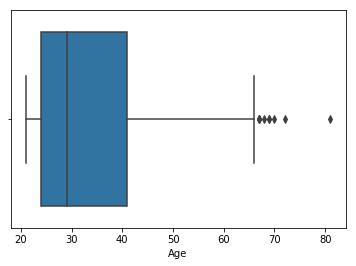

In [27]:
sns.boxplot(df1['Age'])
plt.show()

In [28]:
df1.groupby('Outcome')['Age'].describe()
## older aged patients have more tendency of diabetes

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


In [29]:
df1.groupby(['Pregnancies','Outcome'])['Age'].describe()

count       mean        std   min    25%   50%    75%  \
Pregnancies   Outcome                                                          
1-4           0        283.0  26.805654   7.540978  21.0  22.00  24.0  28.00   
              1         98.0  33.836735  11.590695  21.0  26.00  30.0  37.75   
4-7           0         90.0  39.244444  12.221101  23.0  30.00  37.0  45.00   
              1         62.0  40.483871   9.274930  25.0  33.25  41.0  46.75   
7+            0         54.0  46.277778  10.818253  29.0  39.00  43.0  53.50   
              1         70.0  43.171429   7.693346  22.0  38.00  43.0  47.75   
no pregenancy 0         73.0  27.095890  10.276949  21.0  22.00  23.0  27.00   
              1         38.0  28.578947   8.487293  21.0  24.00  25.5  31.00   

                        max  
Pregnancies   Outcome        
1-4           0        72.0  
              1        70.0  
4-7           0        69.0  
              1        66.0  
7+            0        81.0  
              1        60.0  
no pregenancy 0        67.0  
              1        62.0

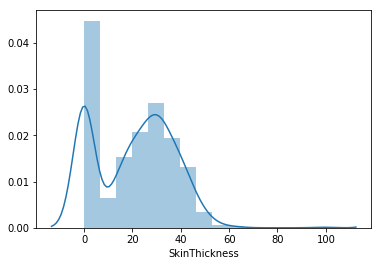

In [30]:
sns.distplot(df1['SkinThickness'])
plt.show()

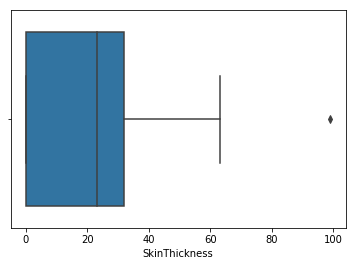

In [31]:
sns.boxplot(df1['SkinThickness'])
plt.show()

In [32]:
df1['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [33]:
df1['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

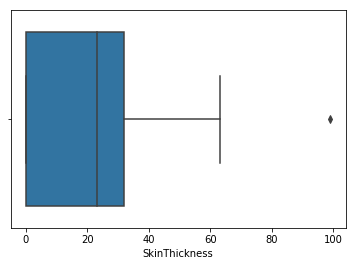

In [34]:
sns.boxplot(df1['SkinThickness'])
plt.show()

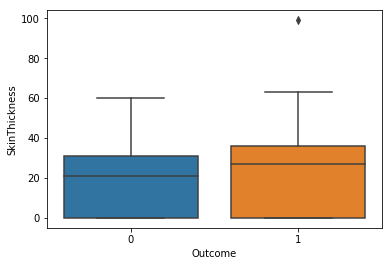

In [35]:
sns.boxplot(df1['Outcome'],df1['SkinThickness'])
plt.show()

In [36]:
df1.groupby('Outcome')['SkinThickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,19.664000,14.889947,0.0,0.0,21.0,31.0,60.0
1,268.0,22.164179,17.679711,0.0,0.0,27.0,36.0,99.0


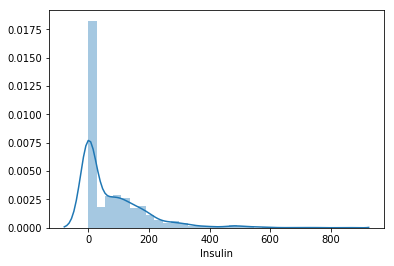

In [37]:
sns.distplot(df1['Insulin'])
plt.show()

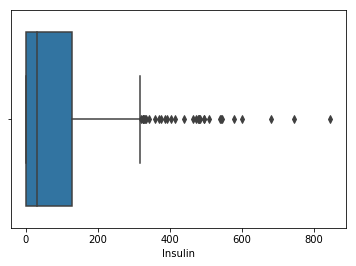

In [38]:
sns.boxplot(df1['Insulin'])
plt.show()

In [39]:
df1.groupby('Outcome')['Insulin'].describe()
## high insulin levels results in diabetes

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


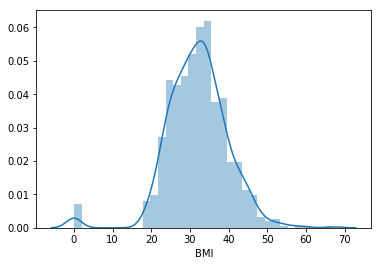

In [40]:
sns.distplot(df1['BMI'])
plt.show()

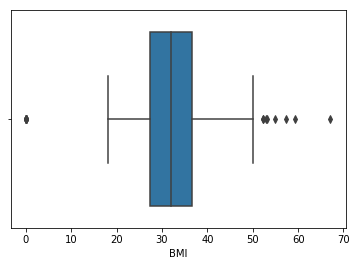

In [41]:
sns.boxplot(df1['BMI'])
plt.show()

In [42]:
df1.groupby('Outcome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,30.304200,7.689855,0.0,25.4,30.05,35.300,57.3
1,268.0,35.142537,7.262967,0.0,30.8,34.25,38.775,67.1


In [43]:
x = df1.drop('Outcome',axis=1)
y = df1['Outcome']

In [44]:
x = pd.get_dummies(x,drop_first=True)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [53]:
lr.fit(x_train, y_train)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_lr = lr.predict(x_test)

In [55]:
print(accuracy_score(y_test, y_pred_lr))

0.7878787878787878


In [56]:
print(confusion_matrix(y_test, y_pred_lr))

[[142  15]
 [ 34  40]]


In [57]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.73      0.54      0.62        74

   micro avg       0.79      0.79      0.79       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.79      0.78       231



In [70]:
from sklearn.model_selection import StratifiedKFold
#LR model
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_lr=lr.fit(x_train,y_train)
    pred_lr=model_lr.predict(x_test)
    print("Train Accuracy:",model_lr.score(x_train,y_train))
    print("Test Accuracy:",model_lr.score(x_test,y_test))
    print(classification_report(y_test,pred_lr))

Train Accuracy: 0.7833876221498371
Test Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

   micro avg       0.77      0.77      0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

Train Accuracy: 0.7915309446254072
Test Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Train Accuracy: 0.7817589576547231
Test Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(x_train, y_train)

C:\Users\amprl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
y_pred_rf = rf.predict(x_test)

In [64]:
print(accuracy_score(y_test, y_pred_rf))

0.7489177489177489


In [65]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.65      0.46      0.54        74

   micro avg       0.75      0.75      0.75       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



In [66]:
print(confusion_matrix(y_test, y_pred_rf))

[[139  18]
 [ 40  34]]


In [71]:
from sklearn.model_selection import StratifiedKFold
#RF model
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    model_rf=rf.fit(x_train,y_train)
    pred_rf=model_rf.predict(x_test)
    print("Train Accuracy:",rf.score(x_train,y_train))
    print("Test Accuracy:",rf.score(x_test,y_test))
    print(classification_report(y_test,pred_rf))

Train Accuracy: 0.9820846905537459
Test Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

   micro avg       0.73      0.73      0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

Train Accuracy: 0.9820846905537459
Test Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.61      0.62        54

   micro avg       0.74      0.74      0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

Train Accuracy: 0.990228013029316
Test Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.

In [69]:
## Random forest classifier model is more accurate than logistic regression model